In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
import math
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving City Power Consumption.xlsx to City Power Consumption.xlsx


In [ ]:
df = pd.read_excel('City Power Consumption.xlsx')

In [ ]:
df.head()

S no Temperature Humidity  Wind Speed  general diffuse flows  \
0     1       6.559     73.8       0.083                  0.051   
1     2       6.414     74.5       0.083                  0.070   
2     3       6.313     74.5       0.080                  0.062   
3     4       6.121       75       0.083                  0.091   
4     5       5.921     75.7       0.081                  0.048   

   diffuse flows  Air Quality Index (PM)  Cloudiness  \
0          0.119                   158.0           1   
1          0.085                   159.0           1   
2          0.100                   151.0           1   
3          0.096                   151.0           1   
4          0.085                   154.0           1   

    Power Consumption in A Zone  
0                   34055.69620  
1                   29814.68354  
2                   29128.10127  
3                   28228.86076  
4                   27335.69620

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [ ]:
df.columns = df.columns.str.replace(' ','_')
df

S_no Temperature Humidity  Wind_Speed  general_diffuse_flows  \
0          1       6.559     73.8       0.083                  0.051   
1          2       6.414     74.5       0.083                  0.070   
2          3       6.313     74.5       0.080                  0.062   
3          4       6.121       75       0.083                  0.091   
4          5       5.921     75.7       0.081                  0.048   
...      ...         ...      ...         ...                    ...   
52578  52579         NaN     75.6       0.094                436.200   
52579  52580         NaN     73.5       0.089                451.600   
52580  52581         NaN     70.1       0.085                466.400   
52581  52582         NaN    67.75       0.086                477.000   
52582  52583         NaN    66.24       0.088                485.700   

       diffuse_flows  Air_Quality_Index_(PM)  Cloudiness  \
0              0.119                   158.0           1   
1              0.085                   159.0           1   
2              0.100                   151.0           1   
3              0.096                   151.0           1   
4              0.085                   154.0           1   
...              ...                     ...         ...   
52578         38.960                   157.0           0   
52579         37.730                   157.0           0   
52580         37.490                   157.0           0   
52581         37.370                   152.0           0   
52582         36.720                   155.0           0   

       _Power_Consumption_in_A_Zone  
0                       34055.69620  
1                       29814.68354  
2                       29128.10127  
3                       28228.86076  
4                       27335.69620  
...                             ...  
52578                   34444.55696  
52579                   34438.48101  
52580                   33873.41772  
52581                   33988.86076  
52582                   34158.98734  

[52583 rows x 9 columns]

In [ ]:
df=df.rename(columns={'_Power_Consumption_in_A_Zone':'A_Zone_Power_consumption'})

In [ ]:
df.duplicated().sum()

0

# **Box plot for Numerical Variables**

In [ ]:
features=['general_diffuse_flows','diffuse_flows','Air_Quality_Index_(PM)']

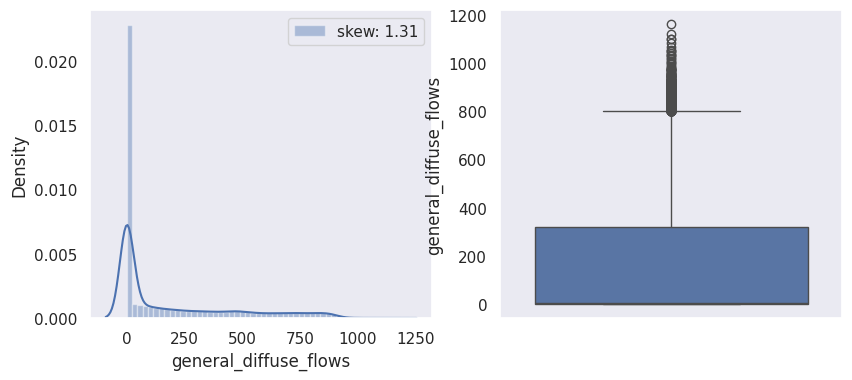

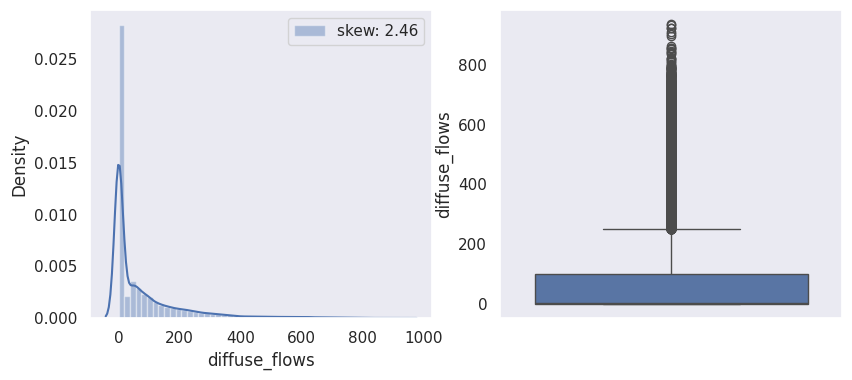

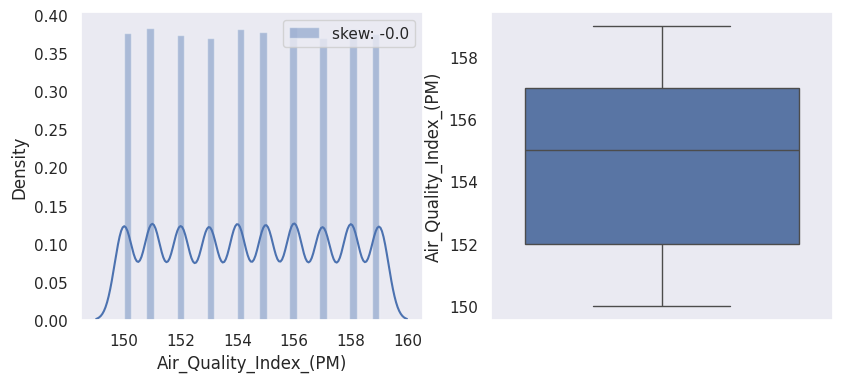

In [ ]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col],label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.show()

# **Pair plot for Numerical Variables**

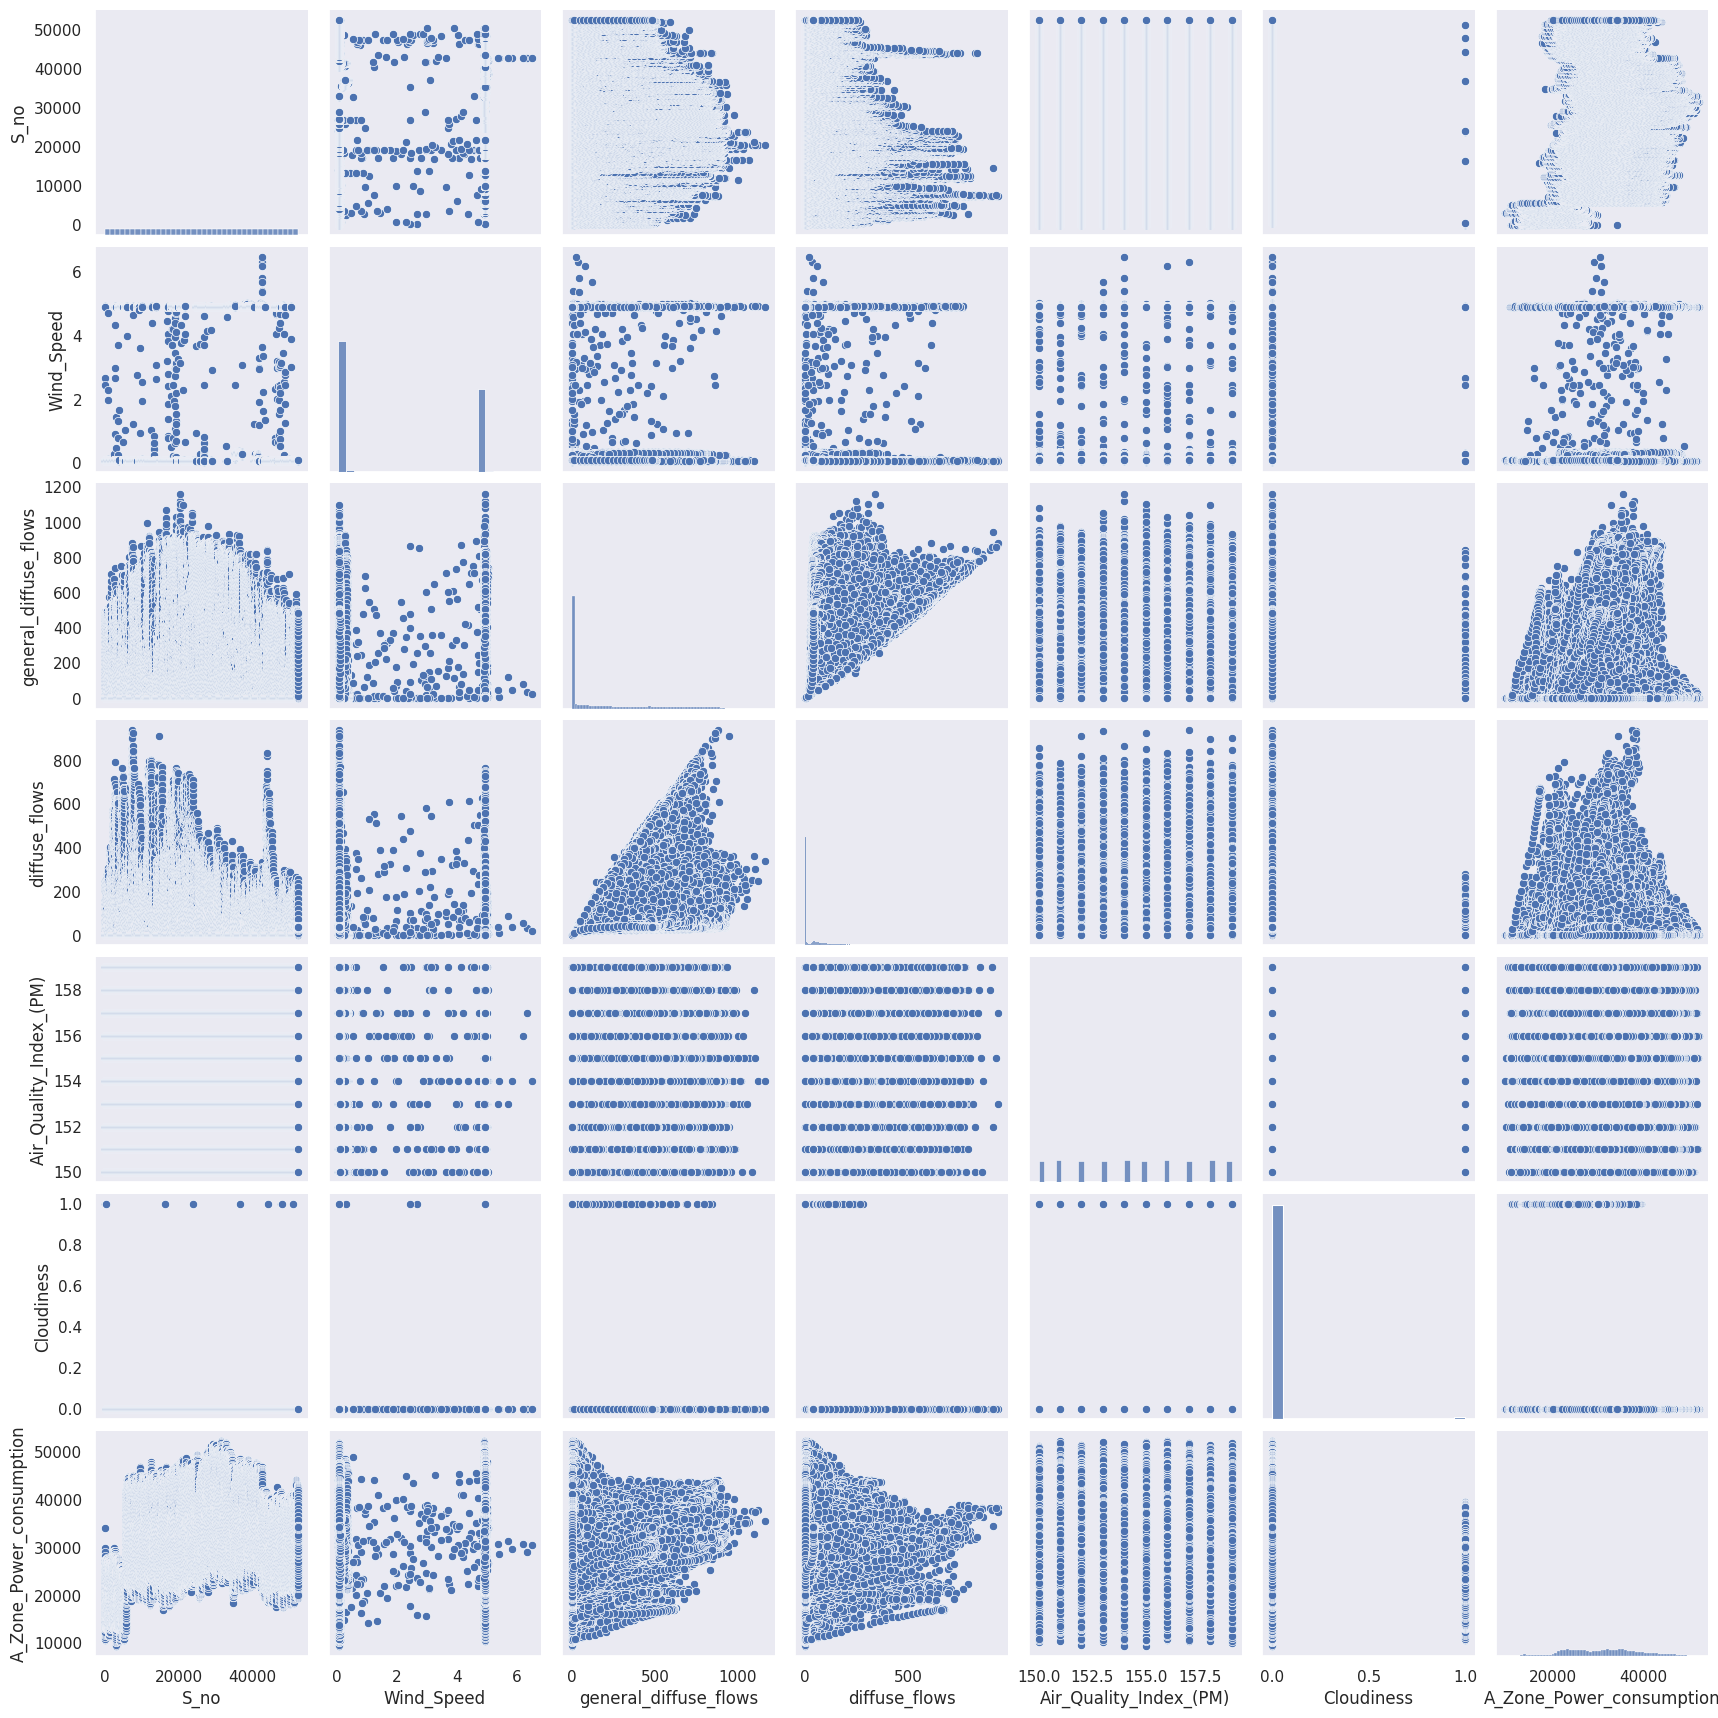

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.pairplot(df)
plt.show()

In [ ]:
df=df.drop(columns={'S_no'},axis=1)

# **Missing Values**

In [ ]:
missing_values=pd.DataFrame({'missing_count':df.isnull().sum(),'missing_count %':df.isnull().sum()/len(df)*100})
missing_values

missing_count  missing_count %
Temperature                         320         0.608562
Humidity                             25         0.047544
Wind_Speed                           71         0.135025
general_diffuse_flows               308         0.585741
diffuse_flows                        15         0.028526
Air_Quality_Index_(PM)               18         0.034232
Cloudiness                            0         0.000000
A_Zone_Power_consumption              0         0.000000

# **Fill Missing Values with Mode and Median Imputation**

In [ ]:
#Replace the missing values for categorical columns with mode
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mode()[0])
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mode()[0])
df['Wind_Speed'] = df['Wind_Speed'].fillna(df['Wind_Speed'].mode()[0])

In [ ]:
df['general_diffuse_flows']= df['general_diffuse_flows'].fillna(df['general_diffuse_flows'].median())
df['diffuse_flows']= df['diffuse_flows'].fillna(df['diffuse_flows'].median())
df['Air_Quality_Index_(PM)']= df['Air_Quality_Index_(PM)'].fillna(df['Air_Quality_Index_(PM)'].median())

In [ ]:
missing_values=pd.DataFrame({'missing_count':df.isnull().sum(),'missing_count %':df.isnull().sum()/len(df)*100})
missing_values

missing_count  missing_count %
Temperature                           0              0.0
Humidity                              0              0.0
Wind_Speed                            0              0.0
general_diffuse_flows                 0              0.0
diffuse_flows                         0              0.0
Air_Quality_Index_(PM)                0              0.0
Cloudiness                            0              0.0
A_Zone_Power_consumption              0              0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               52583 non-null  object 
 1   Humidity                  52583 non-null  object 
 2   Wind_Speed                52583 non-null  float64
 3   general_diffuse_flows     52583 non-null  float64
 4   diffuse_flows             52583 non-null  float64
 5   Air_Quality_Index_(PM)    52583 non-null  float64
 6   Cloudiness                52583 non-null  int64  
 7   A_Zone_Power_consumption  52583 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.2+ MB


# **Capping the Outliers**

In [ ]:
df_cap=df.copy()

In [ ]:
def iqr_capping(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        upper_whisker=q3+(factor*iqr)
        lower_whisker=q1-(factor*iqr)
        df[col]=np.where(df[col]>upper_whisker,upper_whisker,
                np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [ ]:
iqr_capping(df_cap,features,1.5)

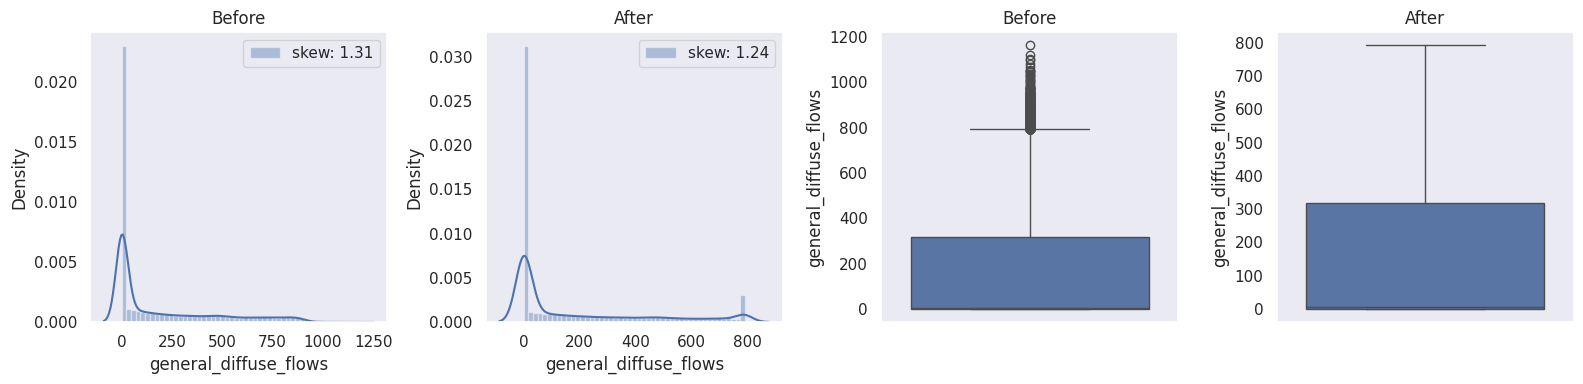

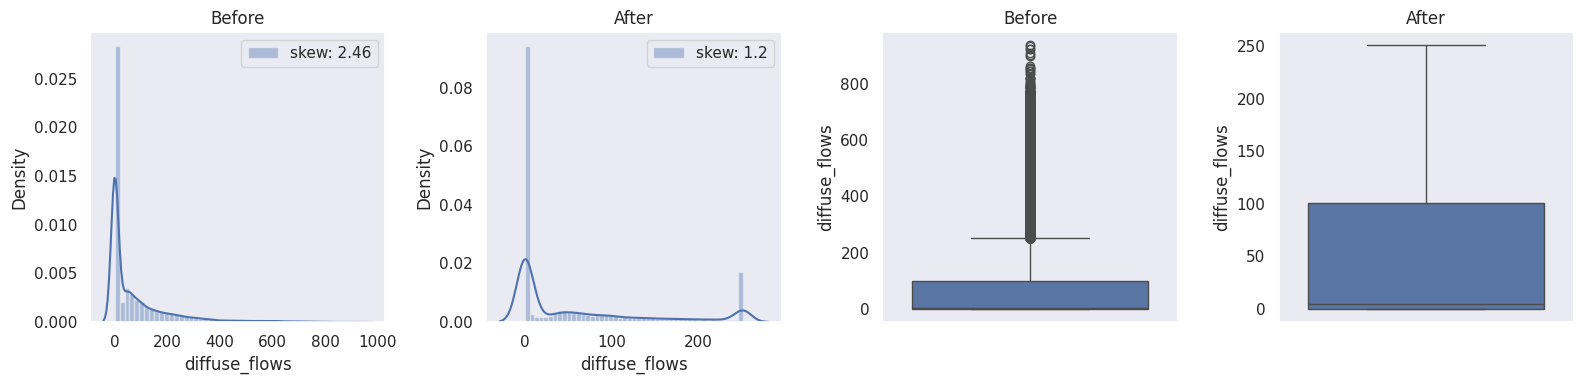

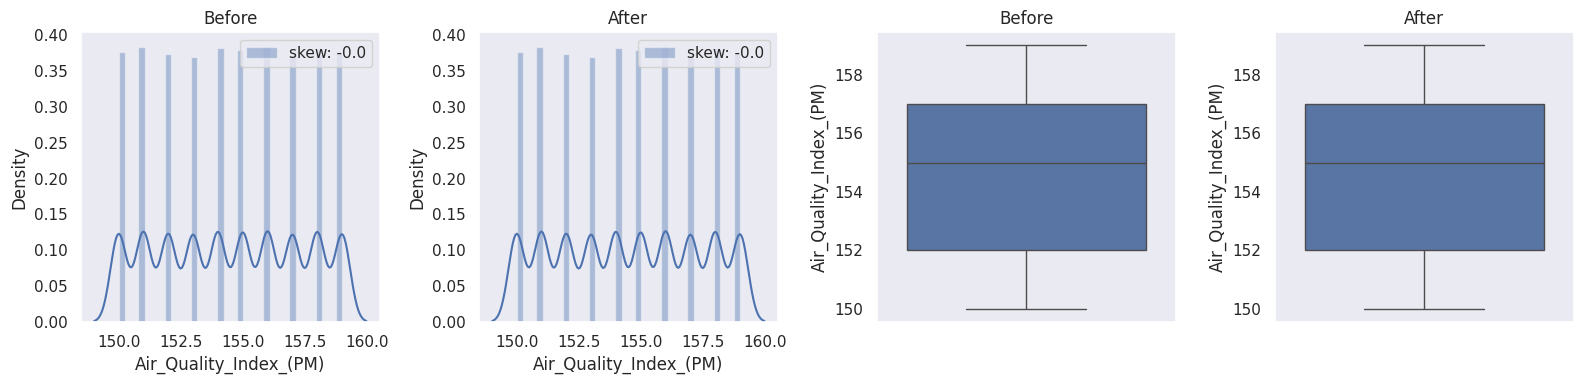

In [ ]:
for col in features:
    plt.figure(figsize=(16,4))
    plt.subplot(141)
    sns.distplot(df[col],label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    plt.subplot(142)
    sns.distplot(df_cap[col],label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

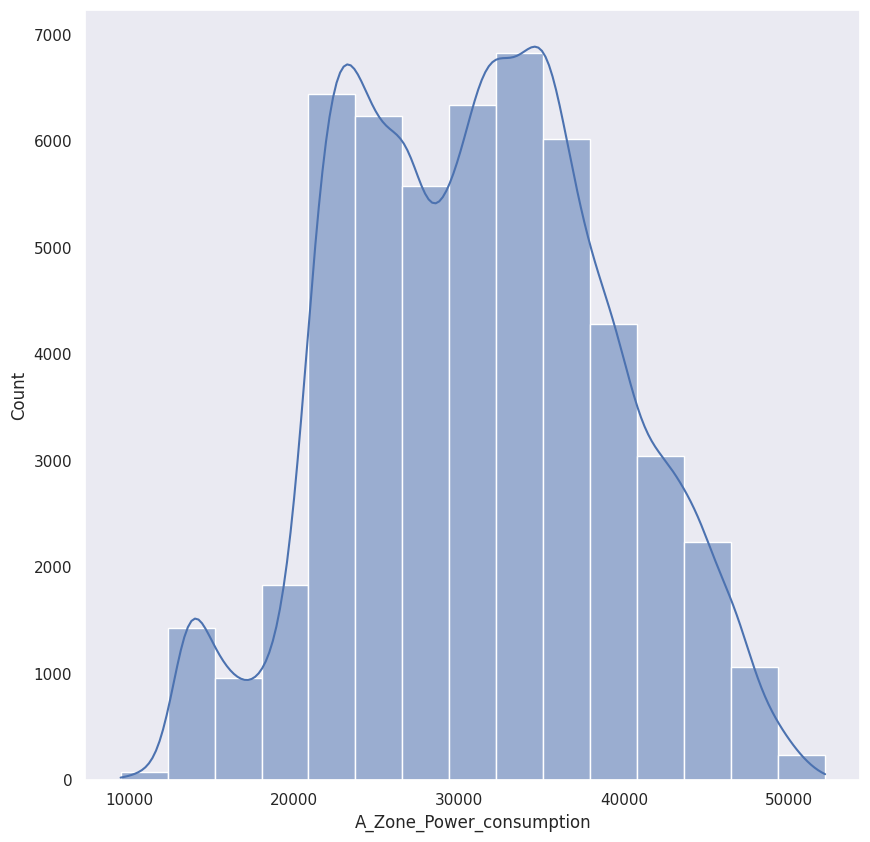

In [ ]:
# Distribution of the observed variables in zone 1
sns.histplot(data=df, x='A_Zone_Power_consumption', bins=15, kde=True)
plt.show()

# **Convert the Categorical variables in Numerical variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               52583 non-null  object 
 1   Humidity                  52583 non-null  object 
 2   Wind_Speed                52583 non-null  float64
 3   general_diffuse_flows     52583 non-null  float64
 4   diffuse_flows             52583 non-null  float64
 5   Air_Quality_Index_(PM)    52583 non-null  float64
 6   Cloudiness                52583 non-null  int64  
 7   A_Zone_Power_consumption  52583 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
df["Temperature"] = df["Temperature"].astype('category')
df["Humidity"] = df["Humidity"].astype('category')
df["Wind_Speed"] = df["Wind_Speed"].astype('category')
df["general_diffuse_flows"] = df["general_diffuse_flows"].astype('category')
df["diffuse_flows"] = df["diffuse_flows"].astype('category')
df["Air_Quality_Index_(PM)"] = df["Air_Quality_Index_(PM)"].astype('category')
df["A_Zone_Power_consumption"] = df["A_Zone_Power_consumption"].astype('category')
df.dtypes

Temperature                 category
Humidity                    category
Wind_Speed                  category
general_diffuse_flows       category
diffuse_flows               category
Air_Quality_Index_(PM)      category
Cloudiness                     int64
A_Zone_Power_consumption    category
dtype: object

In [ ]:
df=df.drop(columns={'Cloudiness'},axis=1)

In [ ]:
df["Temperature"] = df["Temperature"].cat.codes
df["Humidity"] = df["Humidity"].cat.codes
df["Wind_Speed"] = df["Wind_Speed"].cat.codes
df["general_diffuse_flows"] = df["general_diffuse_flows"].cat.codes
df["diffuse_flows"] = df["diffuse_flows"].cat.codes
df["Air_Quality_Index_(PM)"] = df["Air_Quality_Index_(PM)"].cat.codes
df["A_Zone_Power_consumption"] = df["A_Zone_Power_consumption"].cat.codes
df.head()

Temperature  Humidity  Wind_Speed  general_diffuse_flows  diffuse_flows  \
0          415      4232          31                     13             30   
1          373      4239          31                     20             20   
2          351      4239          28                     17             24   
3          307      4244          31                     27             23   
4          258      4251          29                     12             20   

   Air_Quality_Index_(PM)  A_Zone_Power_consumption  
0                       8                     16921  
1                       9                     12124  
2                       1                     11390  
3                       1                     10416  
4                       4                      9474

# **Correlation Heat map**

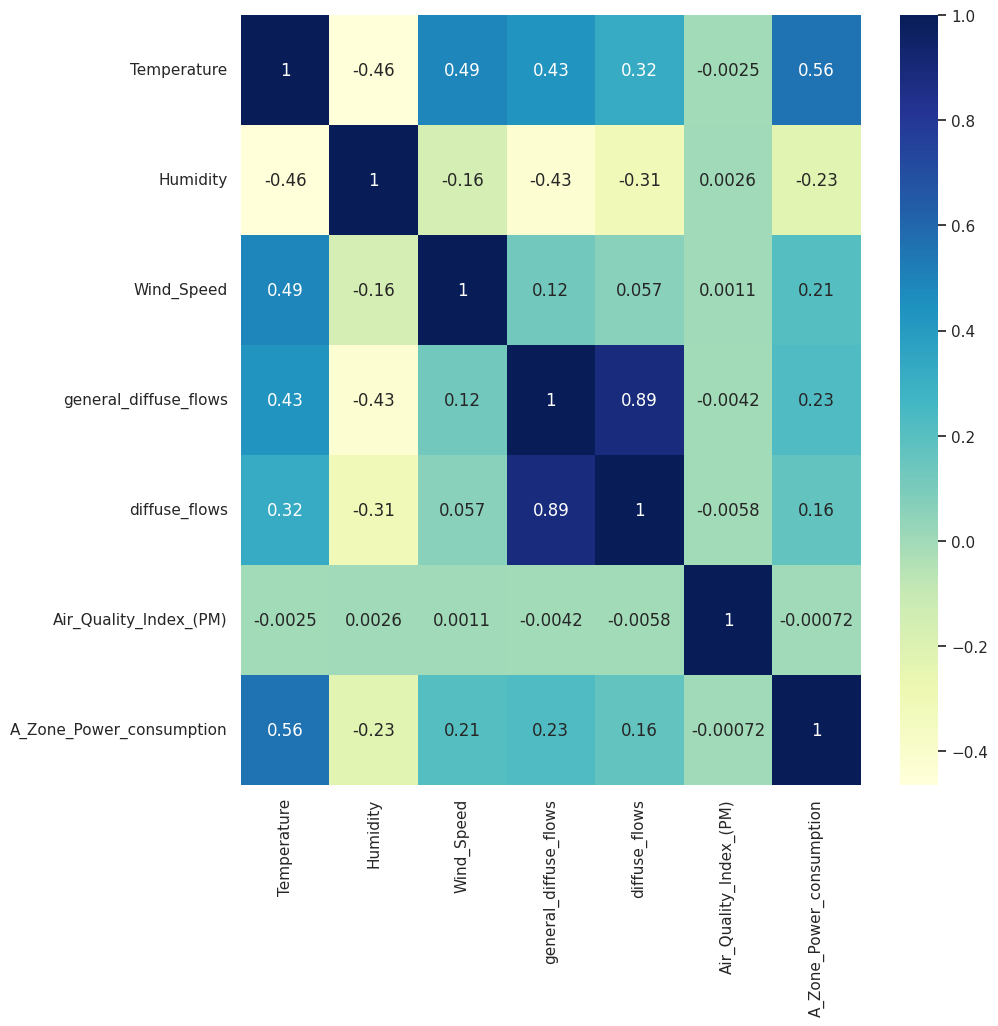

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,fmt='.2g')
plt.show()

# **Pair Plot After Transformation**

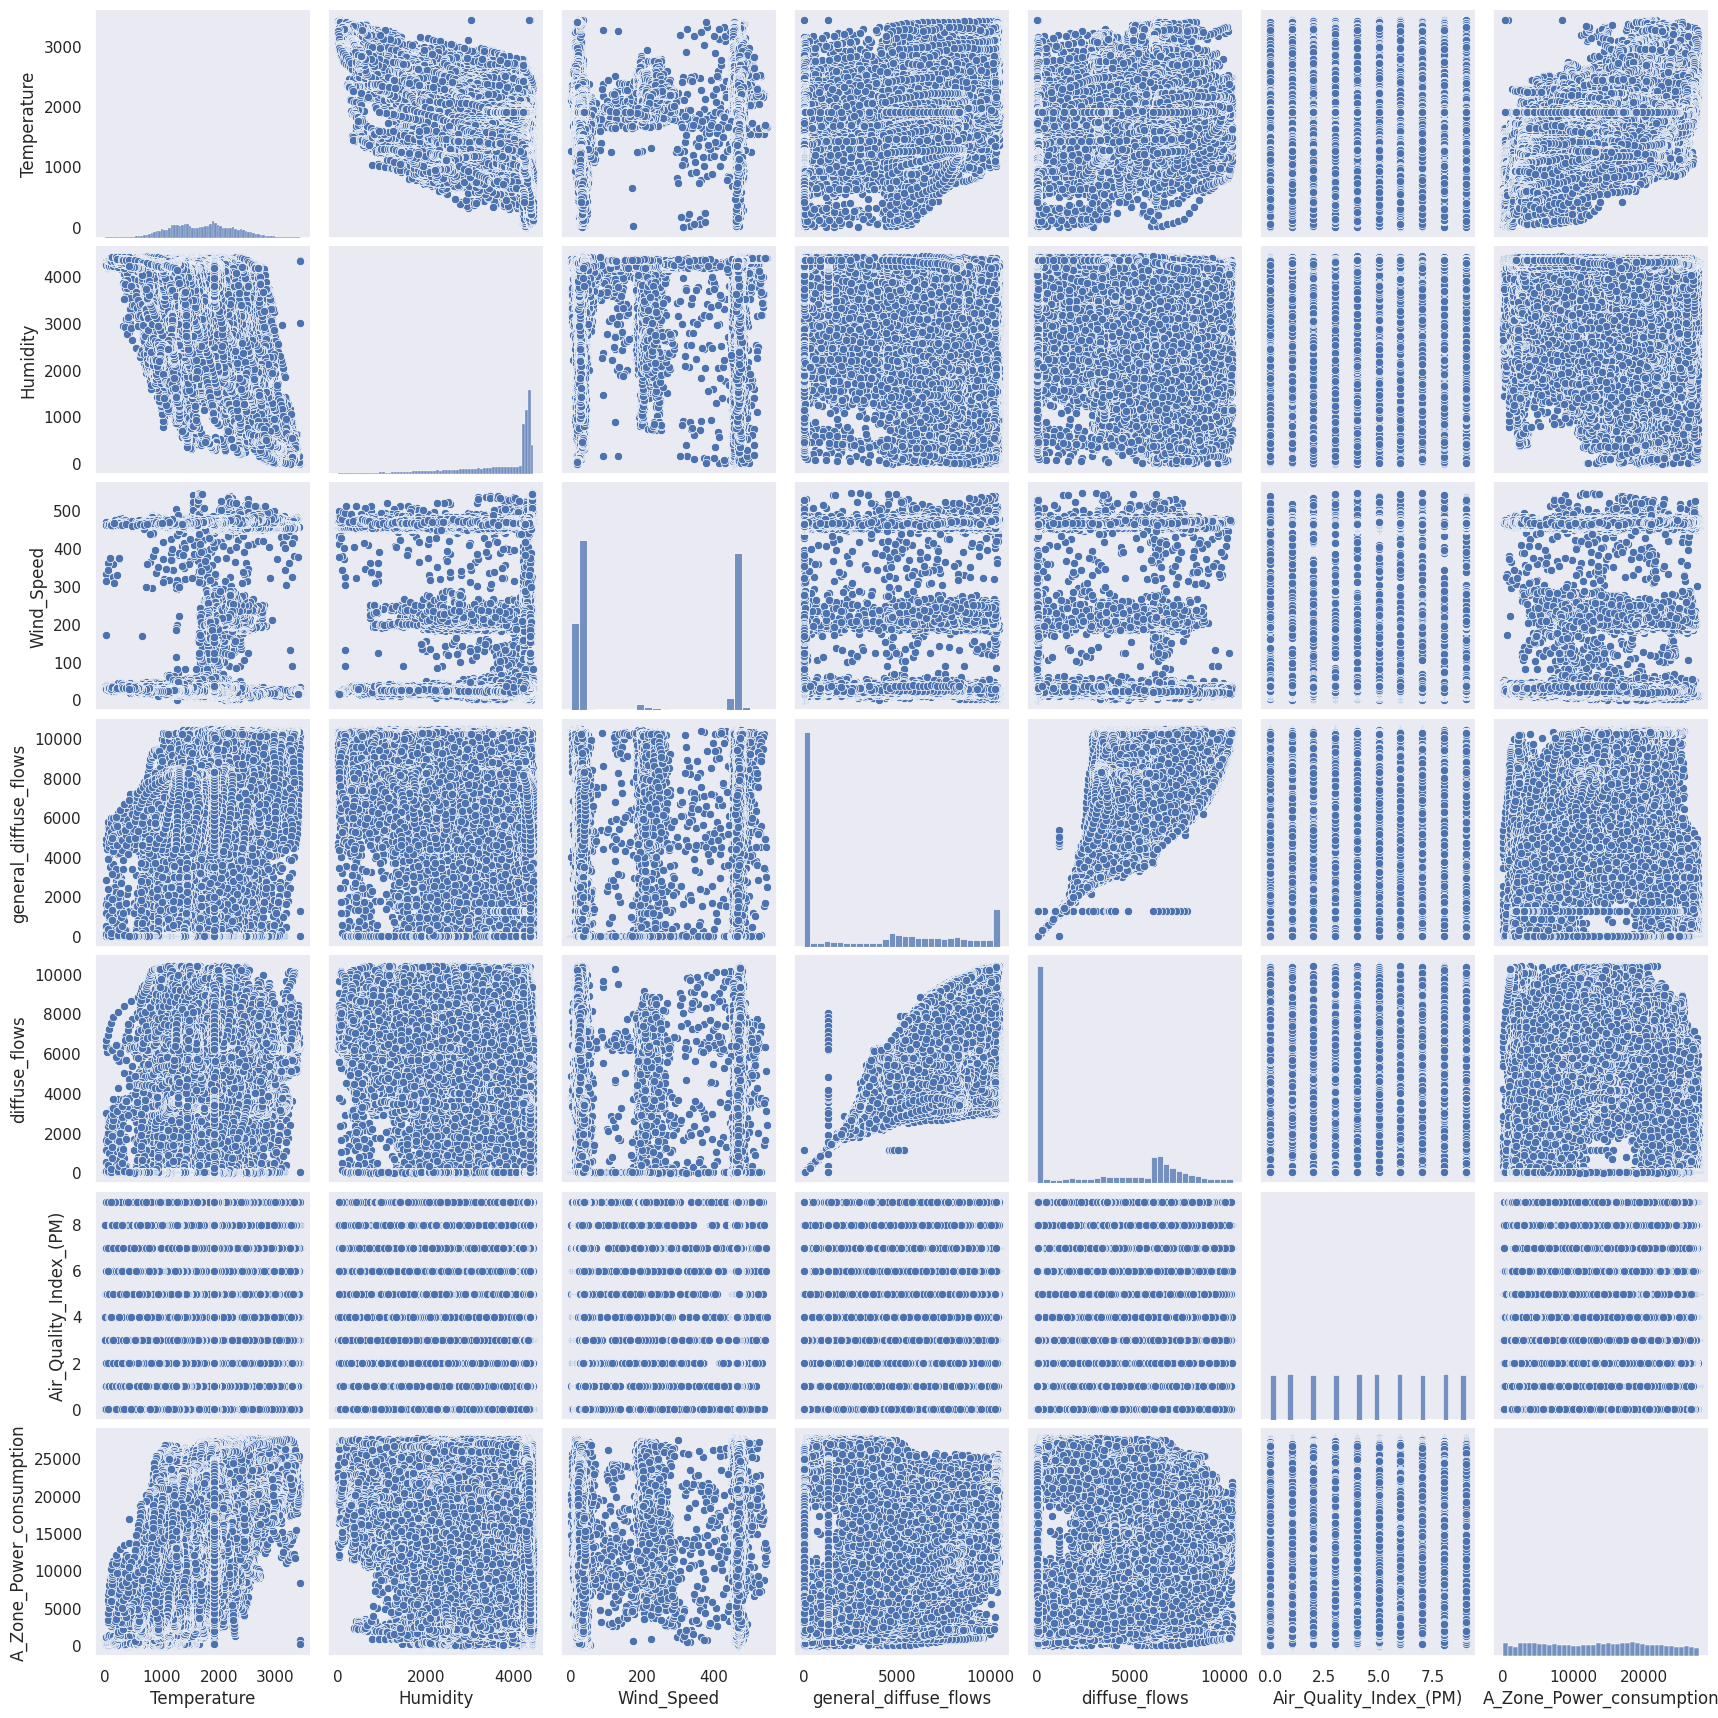

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.pairplot(df)
plt.show()

In [ ]:
df=df.drop(columns={'diffuse_flows','Air_Quality_Index_(PM)'},axis=1)

# **Split the Independent Variables and Dependent Variable**

In [ ]:
X = df.drop('A_Zone_Power_consumption', axis=1)
y =df[['A_Zone_Power_consumption']]

# **Feature Importance**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
for score in zip(model.feature_importances_):
    print(f"Feature : {score}")

Feature : (0.44702198416226785,)
Feature : (0.21287190110443993,)
Feature : (0.16874256822895115,)
Feature : (0.17136354650434119,)


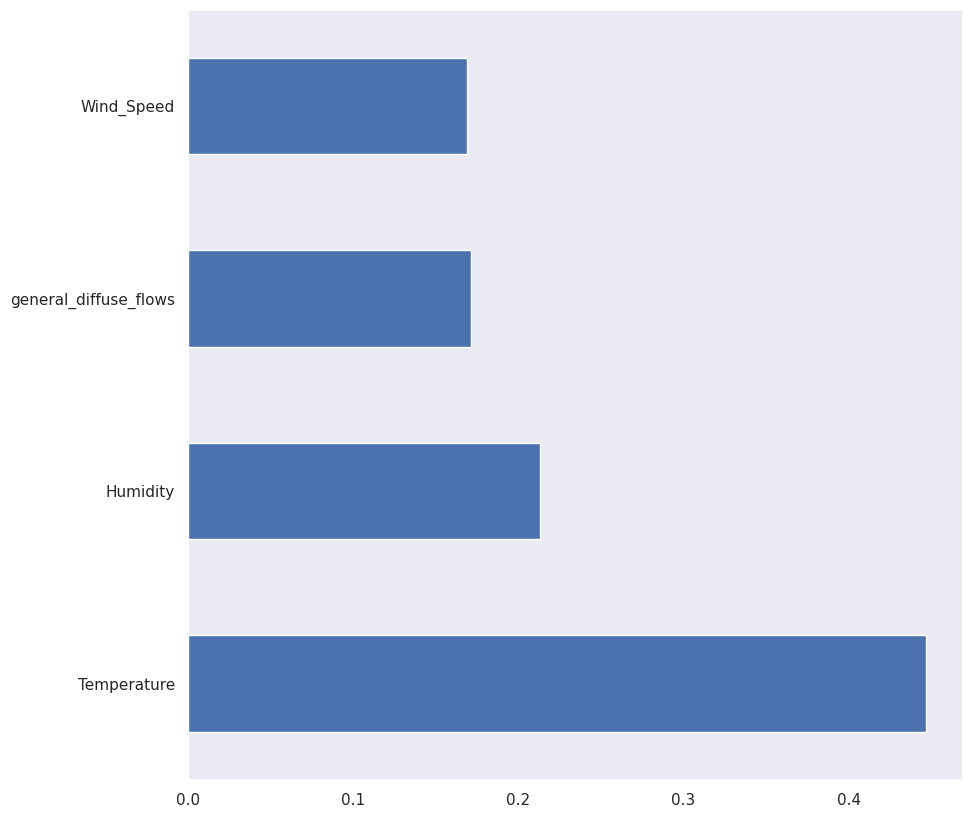

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

# **Splitting the data into training and test for building the model and predicting with test data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **1. Linear Regression**

In [ ]:
lr = LinearRegression()
lr=lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
y_pred_train1=lr.predict(X_train)

In [ ]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred1))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train1))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred1)))

Testing_Accuracy:  0.3208945220850915
Training_Accuracy:  0.31794419186981904
Mean Absolute Error :  5279.696722136911
Mean Squared Error :  41237709.70192911
Root Mean Squared Error :  6421.65941964607


# **2. Random Forest Regressor**

In [ ]:
model=RandomForestRegressor(n_estimators=1000)
rfr=model.fit(X_train,y_train)
y_pred5=rfr.predict(X_test)
y_pred_train5=rfr.predict(X_train)

In [ ]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred5))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train5))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred5))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred5))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred5)))

Testing_Accuracy:  0.5935276401869227
Training_Accuracy:  0.9443205514765542
Mean Absolute Error :  3477.4570292620238
Mean Squared Error :  24682453.199015457
Root Mean Squared Error :  4968.143838398347


# **3. XGB Regressor**

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xr=model.fit(X_train, y_train)
y_pred6=xr.predict(X_test)
y_pred_train6=xr.predict(X_train)

In [ ]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred6))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train6))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred6))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred6))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred6)))

Testing_Accuracy:  0.488541841506958
Training_Accuracy:  0.5450395941734314
Mean Absolute Error :  4287.6187
Mean Squared Error :  31057564.0
Root Mean Squared Error :  5572.931365089651


# **Accuracy Without Applying PCA**

In [ ]:
LR=['Linear Regressor',32.09,31.79,5279.69,41237709.70,6421.65]
RFR=['Random Forest Regressor',59.35,94.43,3474.77,24681259.15,4968.02]
XGR=['XG Boost Regressor',48.85,54.50,4287.61,31057564.00,5572.93]
Table=pd.DataFrame([RFR,XGR,LR])
Table.columns=['Model_Name','Testing_Accuracyin %','Training_Accuracy in%','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
Table

Model_Name  Testing_Accuracyin %  Training_Accuracy in%  \
0  Random Forest Regressor                 59.35                  94.43   
1       XG Boost Regressor                 48.85                  54.50   
2         Linear Regressor                 32.09                  31.79   

   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  
0              3474.77         24681259.15                  4968.02  
1              4287.61         31057564.00                  5572.93  
2              5279.69         41237709.70                  6421.65

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = df[['Temperature','Humidity','Wind_Speed','general_diffuse_flows','A_Zone_Power_consumption']]
scaledX = scale.fit_transform(X)
print(scaledX)

[[-2.25095023  0.64832972 -0.81388357 -0.88985403  0.44721307]
 [-2.32315055  0.65502064 -0.81388357 -0.88803418 -0.16772993]
 [-2.36096977  0.65502064 -0.82804511 -0.88881412 -0.26182377]
 ...
 [ 0.33450887  0.61296343 -0.80444254  1.22715284  0.41965152]
 [ 0.33450887  0.3978982  -0.79972203  1.25341069  0.43747039]
 [ 0.33450887  0.25356553 -0.790281    1.27498893  0.46233987]]


# **Principal Component Analysis(PCA)**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit_transform(scaledX)
X_pca = pca.transform(scaledX)

In [ ]:
scaledX.shape

(52583, 5)

In [ ]:
X_pca.shape

(52583, 2)

# **Splitting the data into training and test for building the model and predicting with test data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# **1. Linear Regression**

In [ ]:
lr = LinearRegression()
lr=lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
y_pred_train1=lr.predict(X_train)

In [ ]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred1))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train1))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred1)))

Testing_Accuracy:  0.4892715666017303
Training_Accuracy:  0.49484278229580425
Mean Absolute Error :  4499.462925005299
Mean Squared Error :  31013254.285128657
Root Mean Squared Error :  5568.954505571818


# **2. Random Forest Regressor**

In [ ]:
model=RandomForestRegressor(n_estimators=1000)
rfr=model.fit(X_train,y_train)
y_pred5=rfr.predict(X_test)
y_pred_train5=rfr.predict(X_train)

In [ ]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred5))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train5))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred5))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred5))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred5)))

Testing_Accuracy:  0.7230180599999297
Training_Accuracy:  0.9632434607540552
Mean Absolute Error :  2734.0449626624404
Mean Squared Error :  16819332.498200264
Root Mean Squared Error :  4101.137951617851


# **3. XG Boost Regressor**

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xr=model.fit(X_train, y_train)
y_pred6=xr.predict(X_test)
y_pred_train6=xr.predict(X_train)

In [ ]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred6))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train6))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred6))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred6))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred6)))

Testing_Accuracy:  0.7516317367553711
Training_Accuracy:  0.7737748622894287
Mean Absolute Error :  2685.004
Mean Squared Error :  15081807.0
Root Mean Squared Error :  3883.530223907109


# **Accuracy With Applying PCA**

In [ ]:
LR=['Linear Regressor',48.92,49.48,4499.46,31013254.28,5568.95]
RFR=['Random Forest Regressor',72.28,96.31,2735.01,16829020.61,4102.31]
XGR=['XG Boost Regressor',75.16,77.37,2685.004,15081807.00,3883.53]
Table=pd.DataFrame([RFR,XGR,LR])
Table.columns=['Model_Name','Testing_Accuracyin %','Training_Accuracy in%','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
Table

Model_Name  Testing_Accuracyin %  Training_Accuracy in%  \
0  Random Forest Regressor                 72.28                  96.31   
1       XG Boost Regressor                 75.16                  77.37   
2         Linear Regressor                 48.92                  49.48   

   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  
0             2735.010         16829020.61                  4102.31  
1             2685.004         15081807.00                  3883.53  
2             4499.460         31013254.28                  5568.95

# **Algorithms by Using Cross-Validation**

# **1. Linear Regression**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)
#build multiple linear regression model
model = LinearRegression()
scores = cross_val_score(model, X_pca, y, scoring='r2',
                         cv=cv, n_jobs=-1).mean()
print(scores)

0.4930399632143933


# **2. Random Forest Regressor**

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1).mean()
# report performance
print(n_scores)

0.6851116959432371


# **3. XGB Regressor**

In [ ]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1).mean()
print(scores)

0.7991403475626339


In [ ]:
LR=['Linear Regressor',49.30]
RFR=['Random Forest Regressor',68.65]
XGR=['XG Boost Regressor',79.91]
Table=pd.DataFrame([XGR,RFR,LR])
Table.columns=['Model_Name','Testing_Accuracyin %']
Table

Model_Name  Testing_Accuracyin %
0       XG Boost Regressor                 79.91
1  Random Forest Regressor                 68.65
2         Linear Regressor                 49.30

In [ ]:
# Assuming X_test and y_test are your test data
y_pred = xr.predict(X_test)

# **Actual vs. Predicted Power Consumption Plot**

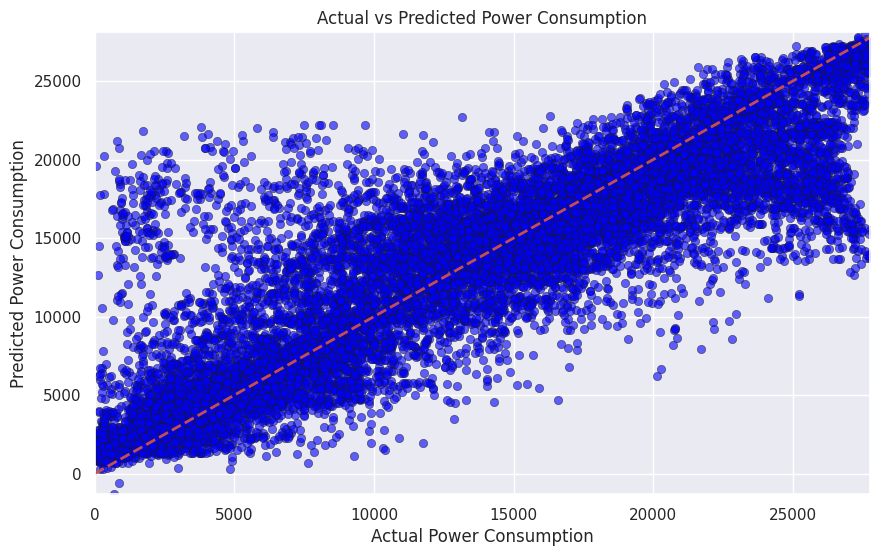

In [ ]:
# Scatter plot for Actual vs. Predicted values
plt.figure(figsize=(10, 6))

# Scatter plot with transparency for better visibility if many points overlap
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k', linewidth=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--', lw=2)  # Perfect prediction line

# Set plot limits
plt.xlim([np.min(y_test) - 1, np.max(y_test) + 1])
plt.ylim([np.min(y_pred) - 1, np.max(y_pred) + 1])

plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.grid(True)
plt.show()

# **Residuals Distribution Plot**

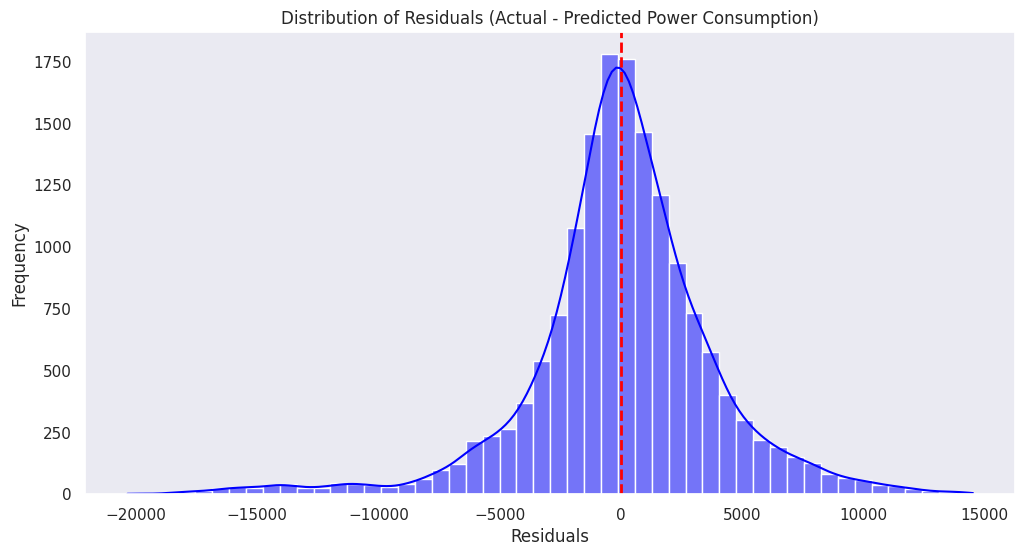

In [ ]:
Dy_test = y_test.squeeze()
y_pred = y_pred.squeeze()

# Calculating residuals
residuals = y_test - y_pred

# Plotting the residuals distribution
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=50, kde=True, color='blue')
plt.title('Distribution of Residuals (Actual - Predicted Power Consumption)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.show()

# **Conclusions and Insights**

## **1. Data Preprocessing**

- **Outlier Handling**: You capped outliers using IQR, which helped reduce skewness in the data and improve the model’s performance.

- **Missing Values**: Mode and median imputation were used to fill missing values, ensuring the data remained consistent without introducing bias.

- **Feature Engineering**: Dropping features with little relevance (e.g., Cloudiness, diffuse_flows, Air Quality Index) and using category encoding for relevant features made the dataset more suitable for modeling.

## **2. Model Comparison Without PCA**

- **Linear Regression**: Performed poorly with R-squared values of around 32% (testing) and 31% (training), indicating it was unable to capture the non-linear relationships in the data.

- **Random Forest**: Showed significant improvement with testing accuracy at 59% and training accuracy at 94%, suggesting the model captured complex patterns, though it slightly overfitted.

- **XGBoost**: Achieved 48% testing accuracy and 54% training accuracy, performing better than linear regression but worse than Random Forest, possibly due to insufficient hyperparameter tuning.

## **3. Model Comparison After PCA**

- **Linear Regression**: R-squared improved to 49% for testing, showing better handling of reduced dimensions.

- **Random Forest**: Testing accuracy rose to 72%, with training accuracy at 96%, further indicating that the model benefits from dimensionality reduction.

- **XGBoost**: Became the best model, with a testing accuracy of 75% and training accuracy of 77%, indicating an appropriate balance between bias and variance.

## **4. Feature Importance**

- **Key Features**: Temperature had the highest influence, followed by humidity and wind speed. These factors are crucial for predicting power consumption due to their direct impact on energy demand for heating, cooling, and ventilation.

## **Insights**

- **Non-Linear Relationships**: The improvement in Random Forest and XGBoost suggests significant non-linear relationships between meteorological factors and power consumption.

- **Dimensionality Reduction**: Applying PCA improved model accuracy by reducing noise and focusing on the most relevant features.

- **Overfitting in Random Forest**: With a high training accuracy (96%), overfitting is a concern. Fine-tuning hyperparameters or using more regularization could help.

- **XGBoost as the Preferred Model**: After PCA, XGBoost performed the best, achieving higher testing accuracy, indicating it effectively captured the data's structure.

- **Actual vs. Predicted Performance**: The scatter plot of actual vs. predicted power consumption shows a positive correlation between actual and predicted values, suggesting the model captures the overall pattern of power consumption. However, there is noticeable dispersion, particularly at higher values, indicating variability in prediction accuracy.

- **Residuals Analysis**: The histogram of residuals is approximately centered around zero but displays some skewness, suggesting that the model has a slight tendency to underpredict or overpredict power consumption in certain situations. The spread of the distribution indicates variability in prediction errors, with a narrower distribution implying more consistent predictions.

## **Conclusion**

- The project successfully built predictive models for power consumption, with XGBoost showing the best performance post-PCA.

- Key factors like temperature, humidity, and wind speed play a significant role in energy consumption.

- Further improvements could involve hyperparameter tuning, ensemble methods, and adding more domain-specific features. Addressing the prediction variability and biases observed in the residuals could enhance model robustness.